In [2]:
import pandas as pd
df = pd.read_csv('compas.csv')

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
gender_counts = df['sex'].value_counts()

# Initialize variables to store counts
male_count = 0
female_count = 0

for sex, count in gender_counts.items():
    if sex == 'Male':
        male_count = count
    elif sex == 'Female':
        female_count = count

print(f"Male Count: {male_count}")
print(f"Female Count: {female_count}")

Male Count: 5819
Female Count: 1395


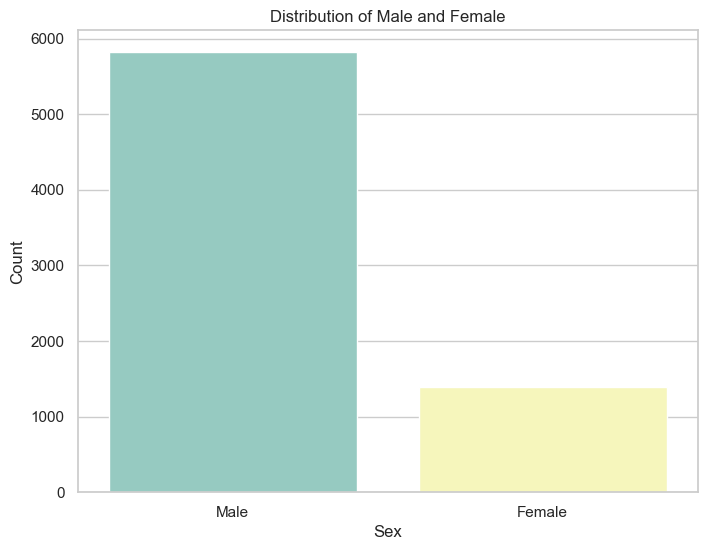

In [4]:
gender_counts = df['sex'].value_counts()

# Create a bar plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Customize the appearance of the bar plot
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Set3")

# Add labels and title
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Distribution of Male and Female")

# Show the plot
plt.show()

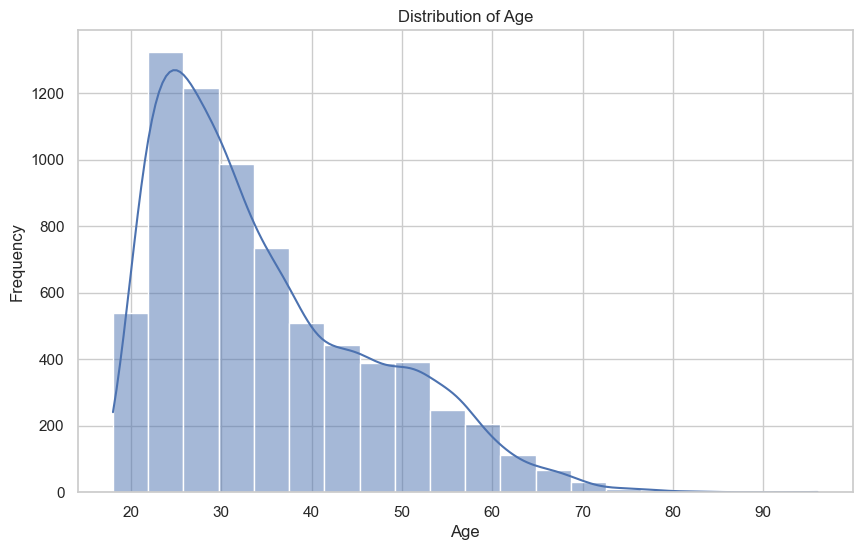

Number of people older than 45: 1463
Number of people between 25 and 45: 4222
Number of people younger than 25: 1529


In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=20, kde=True)

# Customize the appearance of the bar plot
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")

# Show the plot
plt.show()

older_than_45 = 0
between_25_and_45 = 0
younger_than_25 = 0

# Loop through the DataFrame and count the age groups
for index, row in df.iterrows():
    age = row['age']
    if age > 45:
        older_than_45 += 1
    elif 25 <= age <= 45:
        between_25_and_45 += 1
    else:
        younger_than_25 += 1

# Print the counts
print(f"Number of people older than 45: {older_than_45}")
print(f"Number of people between 25 and 45: {between_25_and_45}")
print(f"Number of people younger than 25: {younger_than_25}")

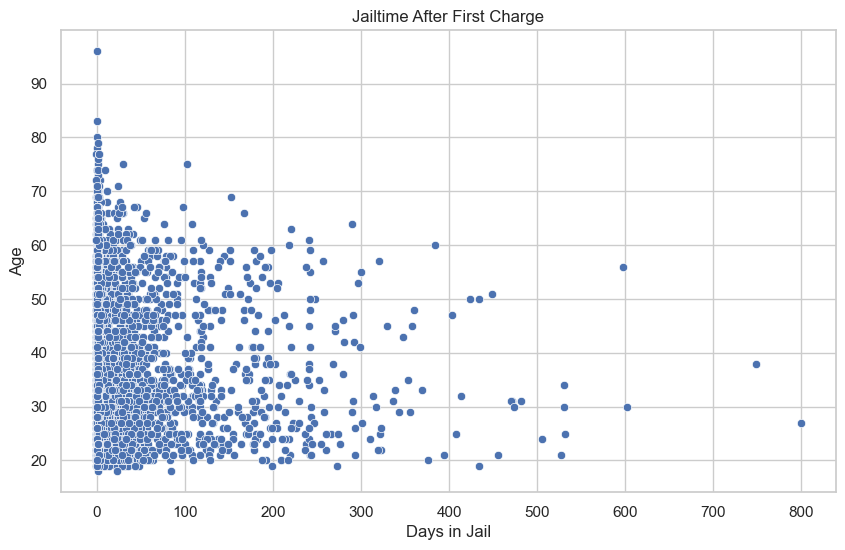

In [6]:
# Convert 'c_jail_in' and 'c_jail_out' columns to datetime objects if they aren't already
df['c_jail_in'] = pd.to_datetime(df['c_jail_in'])
df['c_jail_out'] = pd.to_datetime(df['c_jail_out'])

# Calculate the number of days in jail
df['days_in_jail'] = (df['c_jail_out'] - df['c_jail_in']).dt.days


# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='days_in_jail', y='age', data=df)
plt.title('Jailtime After First Charge')
plt.xlabel('Days in Jail')
plt.ylabel('Age')
plt.show()

6
Other
African-American
Caucasian
Hispanic
Native American
Asian


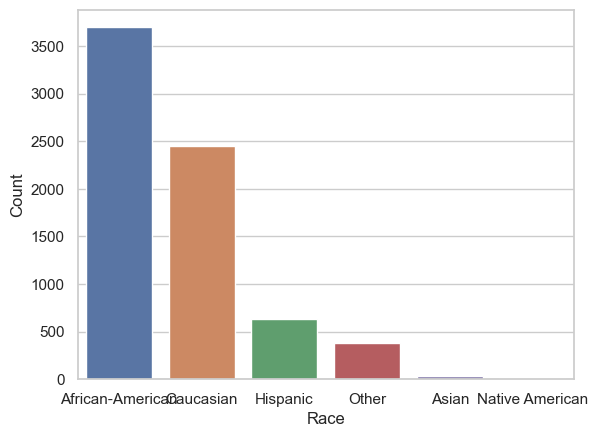

African-American    3696
Caucasian           2454
Hispanic             637
Other                377
Asian                 32
Native American       18
Name: race, dtype: int64


In [7]:
unique_values_count = df['race'].nunique()
print(unique_values_count)

unique_values = df['race'].unique()
for value in unique_values:
    print(value)

# Count the occurrences of each unique value in the 'Category' column
value_counts = df['race'].value_counts()

# Create a bar plot
sns.barplot(x=value_counts.index, y=value_counts.values)


# Add labels
plt.xlabel('Race')
plt.ylabel('Count')

# Show the plot
plt.show()
print(value_counts)






1     1440
2      941
3      747
4      769
5      681
6      641
7      592
8      512
9      508
10     383
Name: decile_score, dtype: int64


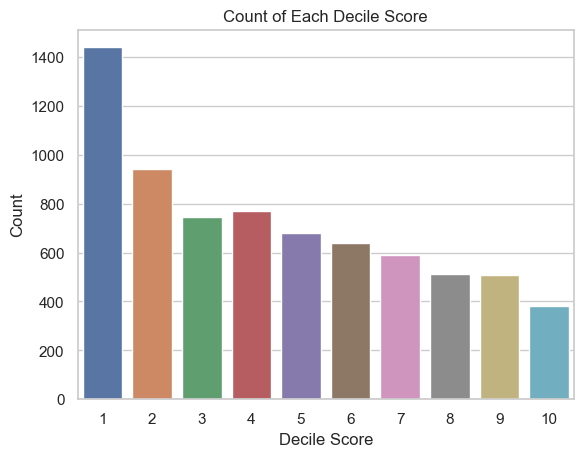

In [8]:
decile_count = df['decile_score'].value_counts().sort_index()

# Create a barplot
sns.barplot(x=decile_count.index, y=decile_count.values)

print(decile_count)

# Adding labels and title
plt.xlabel('Decile Score')
plt.ylabel('Count')
plt.title('Count of Each Decile Score')

# Show the plot
plt.show()

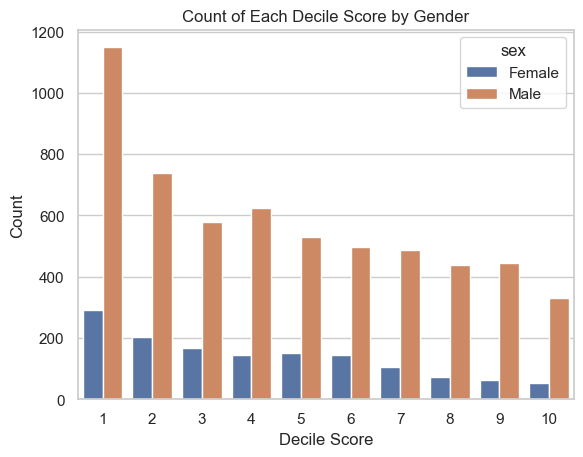

In [9]:
# Calculate decile counts for each gender
decile_count = df.groupby(['sex', 'decile_score']).size().reset_index(name='count')

# Create a bar plot with hue (distinguishing by gender)
sns.barplot(data=decile_count, x='decile_score', y='count', hue='sex')

# Adding labels and title
plt.xlabel('Decile Score')
plt.ylabel('Count')
plt.title('Count of Each Decile Score by Gender')

# Show the plot
plt.show()

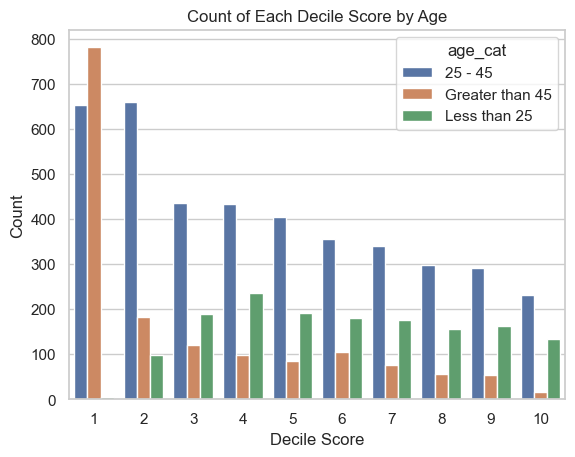

In [10]:
# Calculate decile counts for each gender
decile_count = df.groupby(['age_cat', 'decile_score']).size().reset_index(name='count')

# Create a bar plot with hue (distinguishing by gender)
sns.barplot(data=decile_count, x='decile_score', y='count', hue='age_cat')

# Adding labels and title
plt.xlabel('Decile Score')
plt.ylabel('Count')
plt.title('Count of Each Decile Score by Age')

# Show the plot
plt.show()

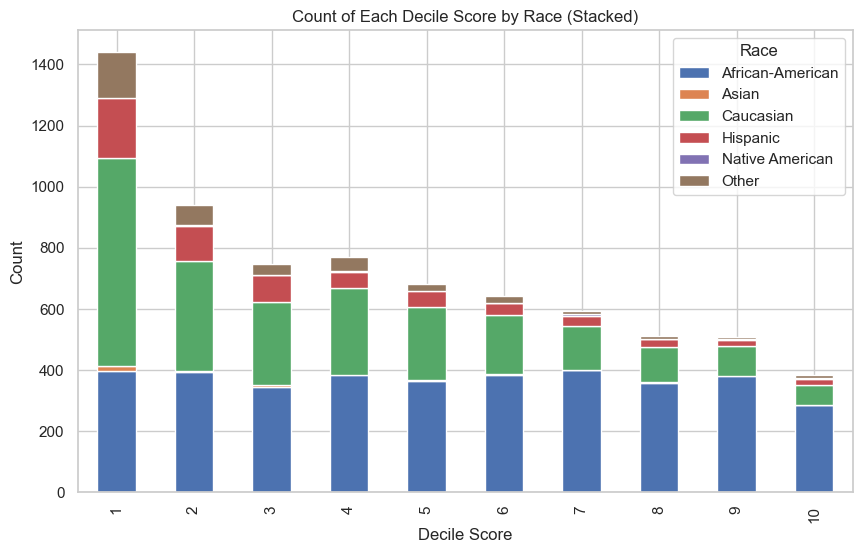

In [11]:
# Calculate decile counts for each gender
decile_count = df.groupby(['race', 'decile_score']).size().reset_index(name='count')

# Pivot the data to create a DataFrame suitable for a stacked bar plot
pivoted_decile_count = decile_count.pivot(index='decile_score', columns='race', values='count')

# Create a stacked bar plot
pivoted_decile_count.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.xlabel('Decile Score')
plt.ylabel('Count')
plt.title('Count of Each Decile Score by Race (Stacked)')

# Show the plot
plt.legend(title='Race', loc='upper right')
plt.show()

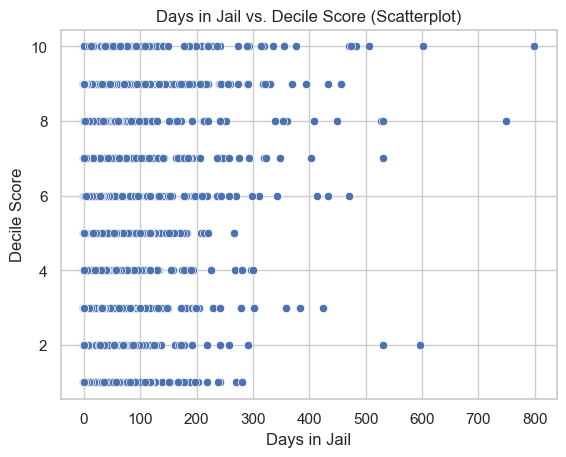

In [12]:
# Convert 'c_jail_in' and 'c_jail_out' to datetime
df['c_jail_in'] = pd.to_datetime(df['c_jail_in'])
df['c_jail_out'] = pd.to_datetime(df['c_jail_out'])

# Calculate the number of days in jail
df['days_in_jail'] = (df['c_jail_out'] - df['c_jail_in']).dt.days

# Create a scatterplot comparing 'days_in_jail' and 'decile_score'
sns.scatterplot(data=df, x='days_in_jail', y='decile_score')

# Adding labels and title
plt.xlabel('Days in Jail')
plt.ylabel('Decile Score')
plt.title('Days in Jail vs. Decile Score (Scatterplot)')

# Show the plot
plt.show()

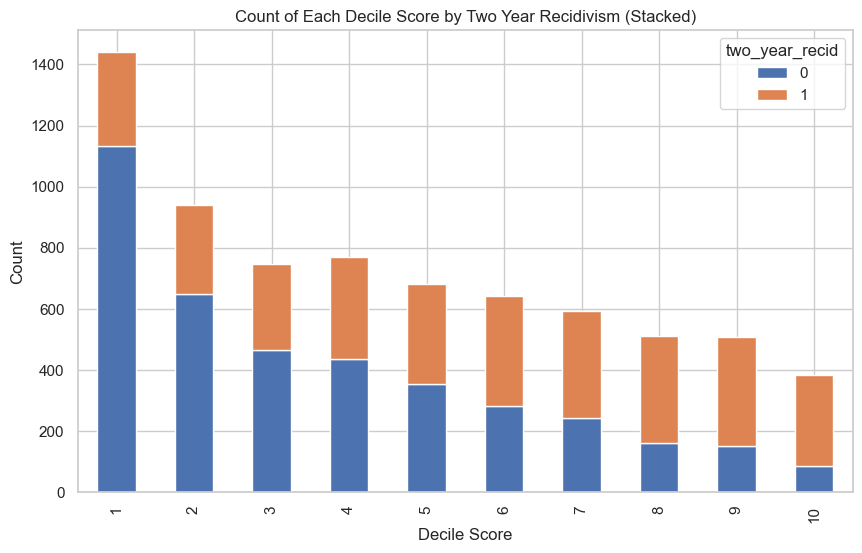

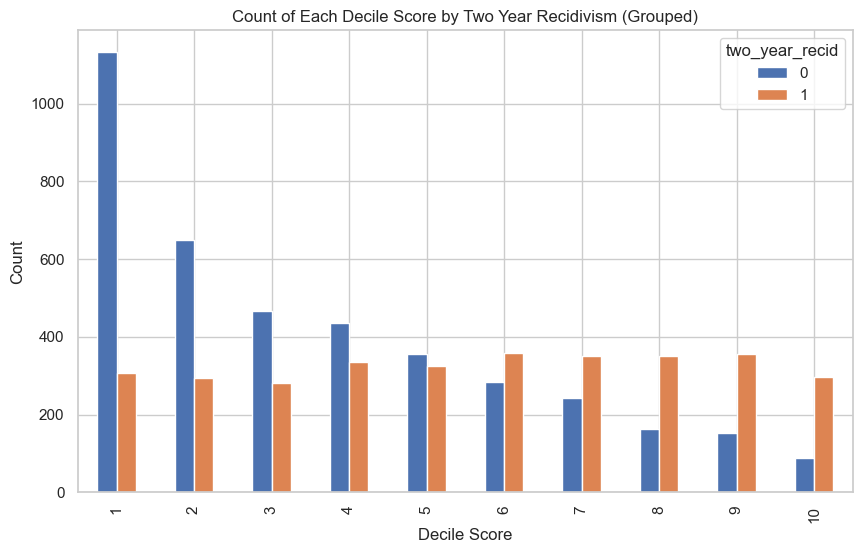

In [16]:
# Calculate decile counts for each group
decile_count = df.groupby(['two_year_recid', 'decile_score']).size().reset_index(name='count')

# Create a stacked bar plot for counts
pivoted_decile_count = decile_count.pivot(index='decile_score', columns='two_year_recid', values='count')
pivoted_decile_count.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Decile Score')
plt.ylabel('Count')
plt.title('Count of Each Decile Score by Two Year Recidivism (Stacked)')

plt.show()

# Create a grouped bar plot
pivoted_decile_count.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Decile Score')
plt.ylabel('Count')
plt.title('Count of Each Decile Score by Two Year Recidivism (Grouped)')

plt.show()